In [1]:
# ==========================================
# 1. SETUP & IMPORTS
# ==========================================
import sys
import os
import importlib

# Add 'src' to the path
sys.path.append(os.path.abspath('../src'))

# Import the evaluation script
import evaluate

# Force reload
importlib.reload(evaluate)

# ==========================================
# 2. EXECUTE EVALUATION ARENA
# ==========================================
print(" STARTING EVALUATION ARENA...")
print("   - Loading models from 'models/'...")
print("   - Testing on the LAST 15% of data (Strictly Unseen).")
print("   - Comparing Accuracy and picking a winner.\n")

# Run the function
evaluate.evaluate_models()

 STARTING EVALUATION ARENA...
   - Loading models from 'models/'...
   - Testing on the LAST 15% of data (Strictly Unseen).
   - Comparing Accuracy and picking a winner.

 Starting Model Evaluation Arena...
   Testing on 120 rows (Last 15%)

MODEL                | ACCURACY  
-----------------------------------
CatBoost             | 0.3333
LightGBM             | 0.2917
LogisticRegression   | 0.3167
RandomForest         | 0.3333
XGBoost              | 0.2833
-----------------------------------
 WINNER: CatBoost (Accuracy: 0.3333)
 Copied winner to: c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\models\best_crypto_model.pkl

 Classification Report (Winner):
              precision    recall  f1-score   support

        SELL       0.31      0.76      0.44        37
        HOLD       0.67      0.09      0.15        46
         BUY       0.33      0.22      0.26        37

    accuracy                           0.33       120
   macro avg       0.44      0.3

('CatBoost',
 680    2
 681    2
 682    0
 683    2
 684    2
       ..
 795    2
 796    1
 797    1
 798    1
 799    1
 Name: label, Length: 120, dtype: int64,
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [2],
        [0],
        [2],
        [2],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
    

 Starting Model Evaluation Arena...
   Testing on 120 rows (Last 15%)

MODEL                | ACCURACY  
-----------------------------------
CatBoost             | 0.3333
LightGBM             | 0.2917
LogisticRegression   | 0.3167
RandomForest         | 0.3333
XGBoost              | 0.2833
-----------------------------------
 WINNER: CatBoost (Accuracy: 0.3333)
 Copied winner to: c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\models\best_crypto_model.pkl

 Classification Report (Winner):
              precision    recall  f1-score   support

        SELL       0.31      0.76      0.44        37
        HOLD       0.67      0.09      0.15        46
         BUY       0.33      0.22      0.26        37

    accuracy                           0.33       120
   macro avg       0.44      0.35      0.29       120
weighted avg       0.45      0.33      0.28       120



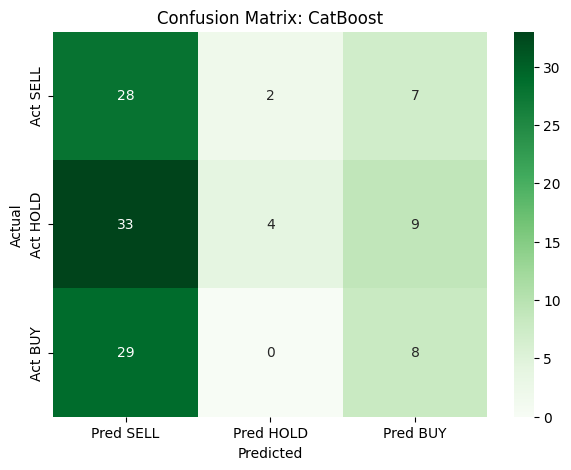

In [ ]:
import sys
import os
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sys.path.append(os.path.abspath('../src'))
import evaluate

# Reload to pick up the fix
importlib.reload(evaluate)

# --- CALL THE FUNCTION ---
# This will now print errors clearly if files are missing
result = evaluate.evaluate_models()

# Check if we got valid results
if result[0] is None:
    print("\nSTOP: Evaluation failed. Check the error messages above.")
    print("   1. Did you run the pipeline to create 'labeled_data.csv'?")
    print("   2. Did you run train.py to create models?")
else:
    # Unpack safely
    name, y_true, y_pred = result
    
    # Plot
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['Pred SELL', 'Pred HOLD', 'Pred BUY'],
                yticklabels=['Act SELL', 'Act HOLD', 'Act BUY'])
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()